In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [13]:
df = pd.read_csv(r'1234893_113821.csv', parse_dates = ['historybegdate'], index_col = ['historybegdate'])
df.head()


,partid,locid,historyamount
historybegdate,,,
2015-08-15,1234893,113821,1062
2015-08-22,1234893,113821,1079
2015-08-29,1234893,113821,1089
2015-09-05,1234893,113821,1106
2015-09-12,1234893,113821,1047


In [14]:
df = df.drop(['locid'],axis=1)
df = df.drop(['partid'],axis=1)

df

,historyamount
historybegdate,
2015-08-15,1062
2015-08-22,1079
2015-08-29,1089
2015-09-05,1106
2015-09-12,1047
2015-09-19,987
2015-09-26,1022
2015-10-03,1240
2015-10-10,1301


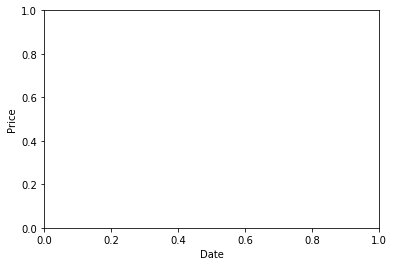

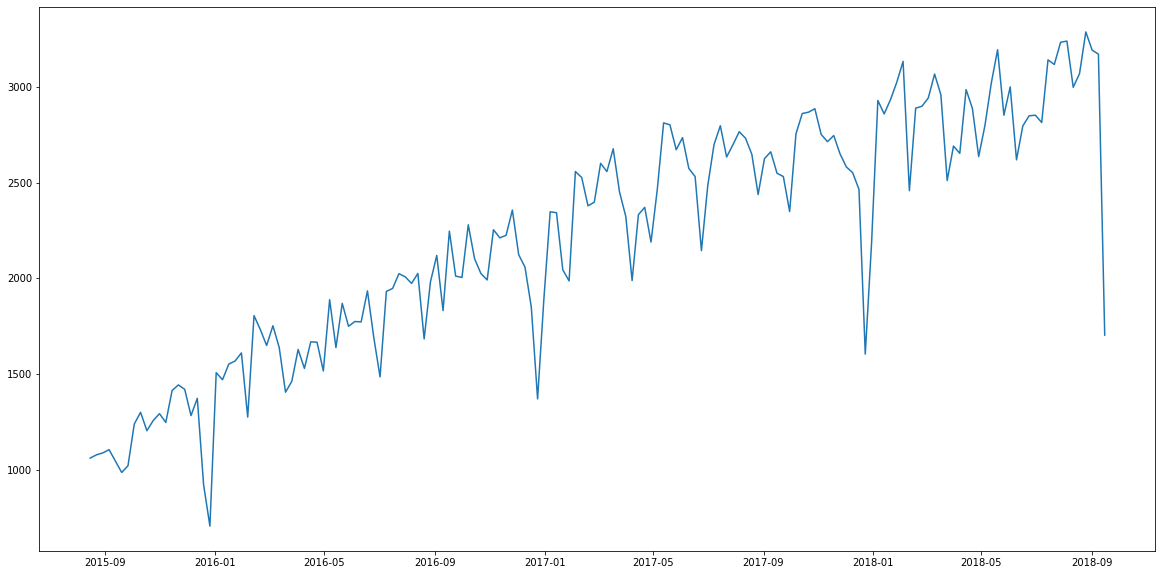

In [15]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

In [17]:
#Checking Naive model and getting 
series_value = df.values
df_naive = pd.concat([df,df.shift(1)],axis=1)
df_naive.head()

,historyamount,historyamount
historybegdate,,
2015-08-15,1062,NaN
2015-08-22,1079,1062.0
2015-08-29,1089,1079.0
2015-09-05,1106,1089.0
2015-09-12,1047,1106.0


In [18]:
df_naive.columns = ['Actual_Vaue','Shifted_Value']

In [19]:
df_naive.head()

,Actual_Vaue,Shifted_Value
historybegdate,,
2015-08-15,1062,NaN
2015-08-22,1079,1062.0
2015-08-29,1089,1079.0
2015-09-05,1106,1089.0
2015-09-12,1047,1106.0


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np
#Below commnad to remove Nan value at the top of shifted data 
df_naive_test = df_naive[1:]
print(df_naive_test.head(5))
#Below are the naive errors by shifting the data with 1 position and it is like baseline error 
df_naive_error = mean_squared_error(df_naive_test.Actual_Vaue,df_naive_test.Shifted_Value)
print('df_naive_error is : ',df_naive_error)
print('square root od error is ',np.sqrt(df_naive_error))

                Actual_Vaue  Shifted_Value
historybegdate                            
2015-08-22             1079         1062.0
2015-08-29             1089         1079.0
2015-09-05             1106         1089.0
2015-09-12             1047         1106.0
2015-09-19              987         1047.0
df_naive_error is :  68981.29192546583
square root od error is  262.64289810589935


In [23]:
#By looking at standard deviation we can prdict the aseline error is nearly correct 
df.describe()

,historyamount
count,162.000000
mean,2214.561728
std,623.574737
min,707.000000
25%,1695.750000
50%,2328.000000
75%,2734.250000
max,3287.000000


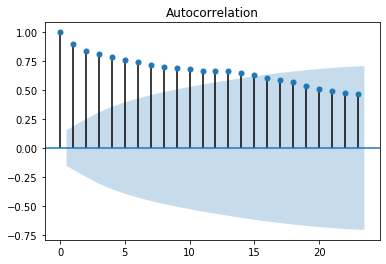

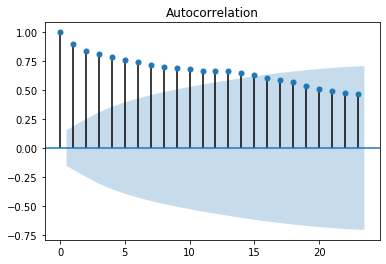

In [26]:
#plot_acf to identify q for model ARIMA(p,d,q)
#Here we can take those value for q which lies above  the blue region as auto corelation will
#be very less on those value which is mandatory for ARIMA model. Here we see that suitable
#values starts from 1 and goes till12 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df)

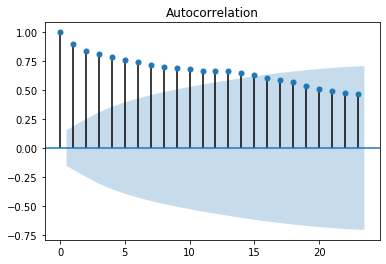

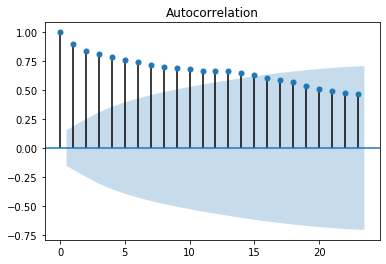

In [27]:
#pacf chart for partial auto correlation function and to get suitable value for p like we did for acf . Here sitable values are 1 till 13
plot_pacf(df)

In [28]:
df_train = df[0:130]
df_test = df[130:162]
print('size of train dataset is ',df_train.size)
print('size of test dataset is ',df_test.size)

size of train dataset is  130
size of test dataset is  32


In [34]:
from statsmodels.tsa.arima_model import ARIMA
naive_model = ARIMA(df_train,order=(5,2,5))
naive_model_fit = naive_model.fit()
#Achaic Information Criteria . lower it is , better the model is 
print('aic value for this model is ',naive_model_fit.aic)
df_naive_forecast = naive_model_fit.forecast(steps=32)[0]
df_naive_forecast

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


aic value for this model is  nan


c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan])

In [35]:
rolling_mean = df.rolling(window = 4).mean()
rolling_std = df.rolling(window = 4).std()
print(rolling_mean.head(20))
print(len(rolling_mean))

                historyamount
historybegdate               
2015-08-15                NaN
2015-08-22                NaN
2015-08-29                NaN
2015-09-05            1084.00
2015-09-12            1080.25
2015-09-19            1057.25
2015-09-26            1040.50
2015-10-03            1074.00
2015-10-10            1137.50
2015-10-17            1192.00
2015-10-24            1251.00
2015-10-31            1264.50
2015-11-07            1251.25
2015-11-14            1303.75
2015-11-21            1350.25
2015-11-28            1382.00
2015-12-05            1391.00
2015-12-12            1380.75
2015-12-19            1250.50
2015-12-26            1072.00
162


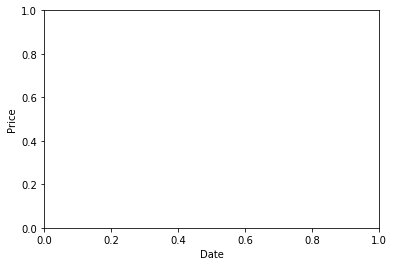

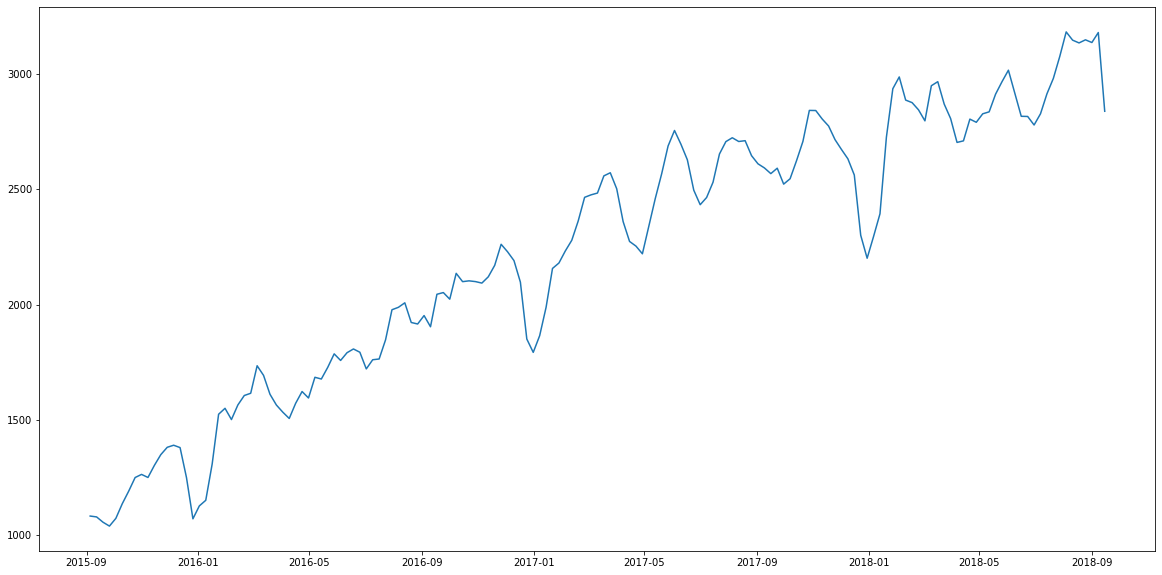

In [36]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(rolling_mean)

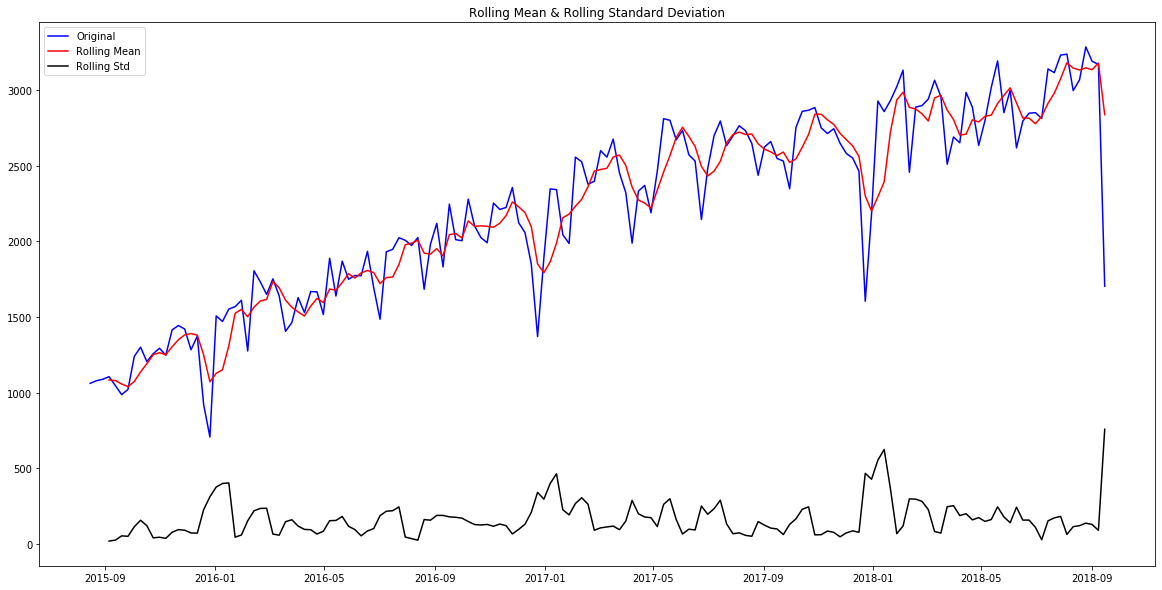

In [37]:
plt.figure(figsize=(20,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [38]:
result = adfuller(df['historyamount'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('No. OF Lags USed: {}'.format(result[2]))
print('No. OF Observations USed: {}'.format(result[3]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.8982783935009064
p-value: 0.3328714417090851
No. OF Lags USed: 13
No. OF Observations USed: 148
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873


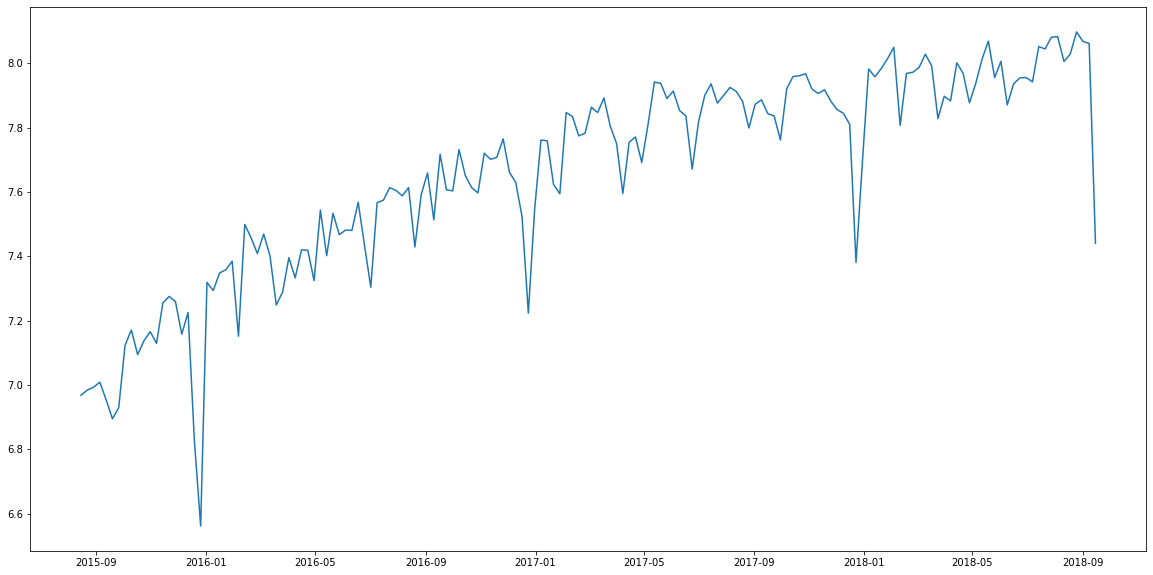

In [39]:
df_log = np.log(df)
plt.figure(figsize=(20,10))
plt.plot(df_log)

In [40]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=4).mean()
    rolling_std = timeseries.rolling(window=4).std()
    
    # rolling statistics plot
    plt.figure(figsize=(20,10))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['historyamount'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('No. OF Lags USed: {}'.format(result[2]))
    print('No. OF Observations USed: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

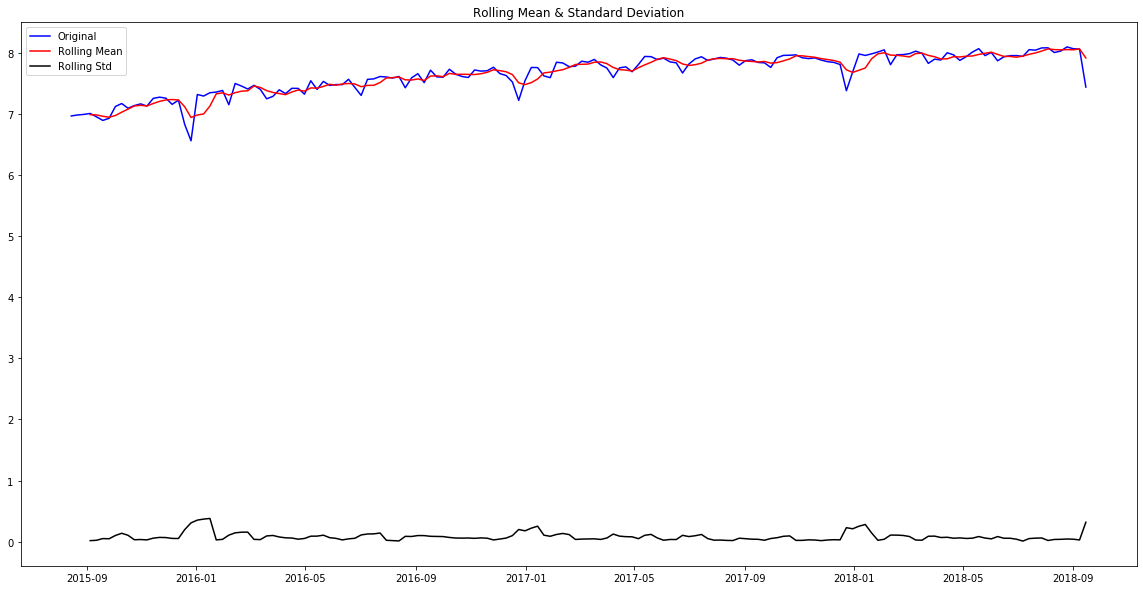

ADF Statistic: -2.8113805006373522
p-value: 0.05666644312564403
No. OF Lags USed: 13
No. OF Observations USed: 148
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873


In [41]:
#Taking Data with log scale 
get_stationarity(df_log)
#Can see data nt ststionary with p value and ADF Statistics 

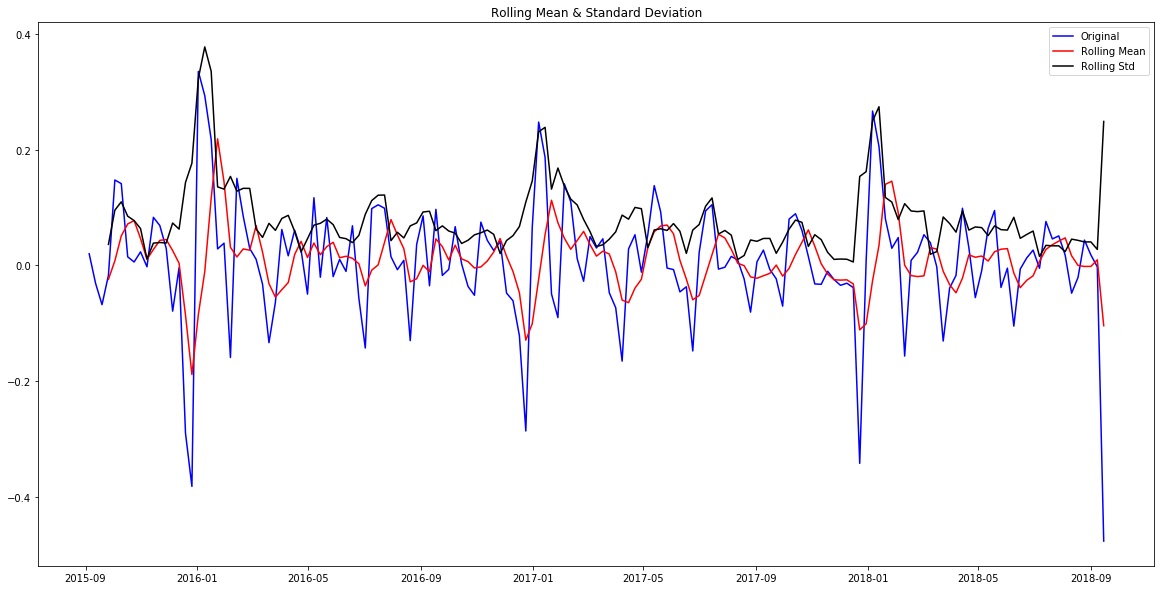

ADF Statistic: -6.892943191020295
p-value: 1.3411424084452474e-09
No. OF Lags USed: 10
No. OF Observations USed: 148
Critical Values:
	1%: -3.4753253063120644
	5%: -2.881274703275226
	10%: -2.5772928360116873


In [43]:
#Deducting the mean of log values from log data set 
rolling_mean = df_log.rolling(window=4).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)
# This is giving us good  results as p value is extremely low and hence data is quite stationary 

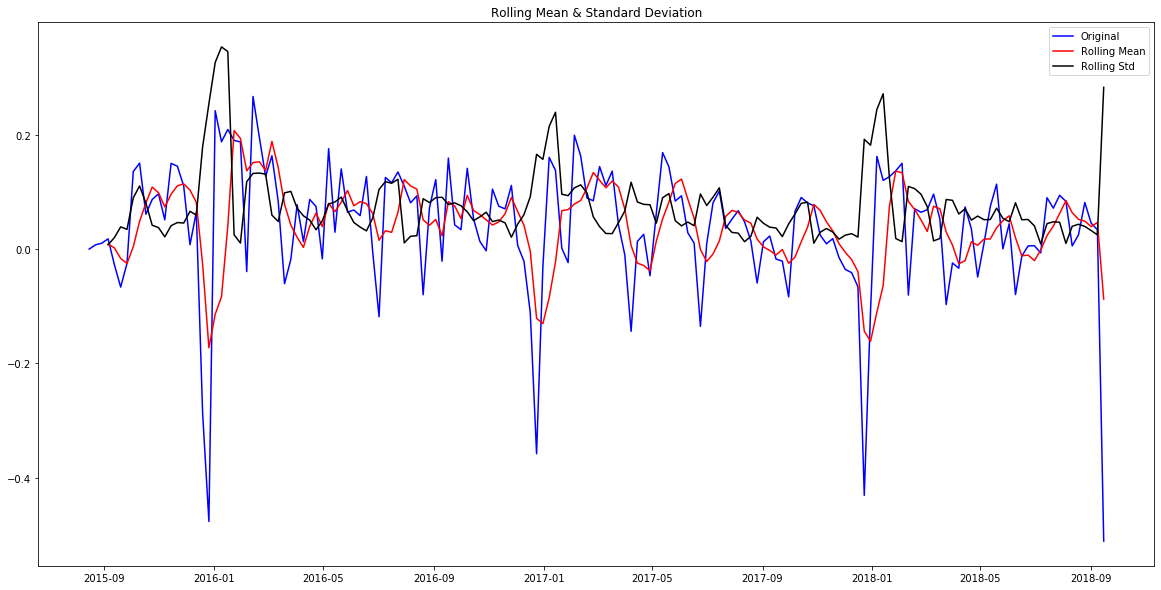

ADF Statistic: -7.510195571405876
p-value: 4.0345687629329524e-11
No. OF Lags USed: 1
No. OF Observations USed: 160
Critical Values:
	1%: -3.4718957209472654
	5%: -2.8797795410156253
	10%: -2.5764947265625


In [44]:
#Subtracting exponential decay mean from log data 
rolling_mean_exp_decay = df_log.ewm(halflife=5, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
get_stationarity(df_log_exp_decay)
#THis looks like best result as our p value is low and from adf statistics we can say that we are 95% sure that 
#data is stationary

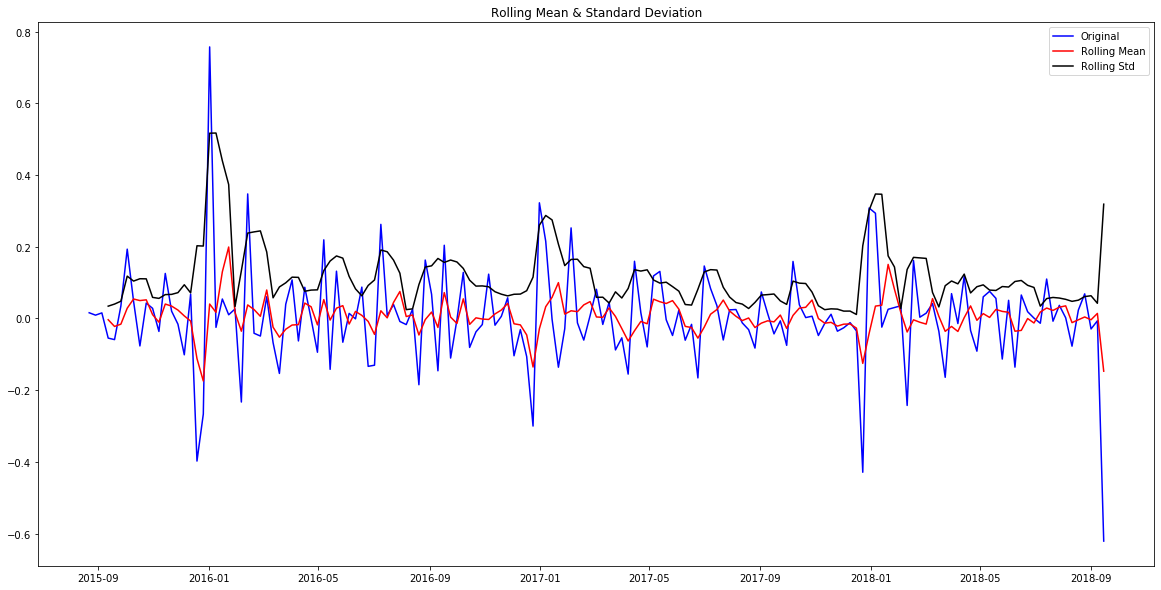

ADF Statistic: -6.473522222093985
p-value: 1.348712795690843e-08
No. OF Lags USed: 11
No. OF Observations USed: 149
Critical Values:
	1%: -3.4750180242954167
	5%: -2.8811408028842043
	10%: -2.577221358046935


In [45]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
#Very much staionary as p value is extremely low and 99% confidence that data is staionary 

In [53]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')#ordinary least square method


Text(0.5, 1.0, 'Autocorrelation Function')

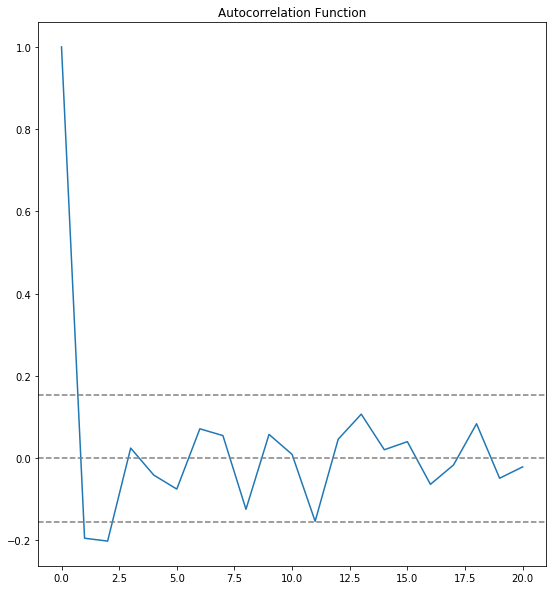

In [54]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#q= The lag value where the ACF chart crosses the upper confidence interval for the first time.
#If you notice closely, in this case q=1.

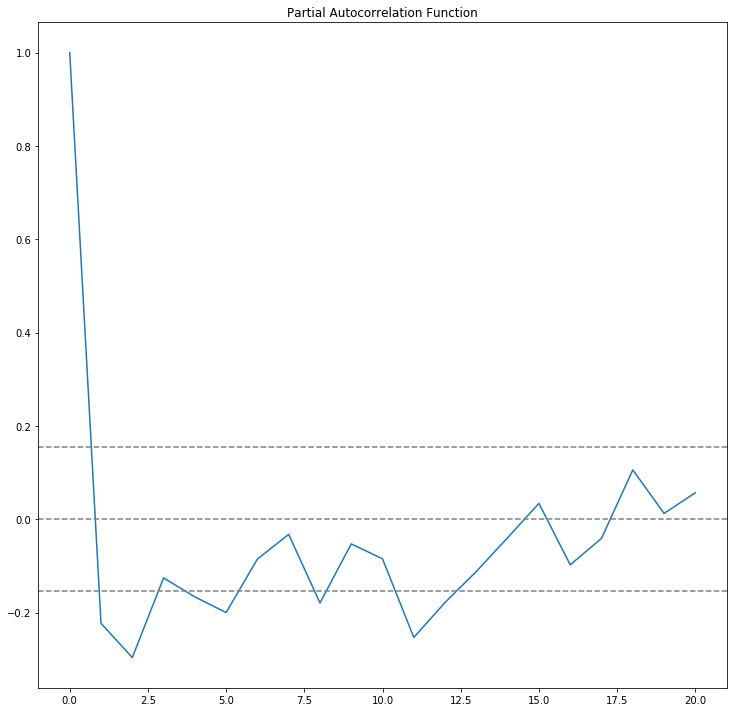

In [56]:
#Plot PACF:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
#If you notice closely, in this case p=1.

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


aic value for this model is  -208.41832407577243
Plotting AR Model


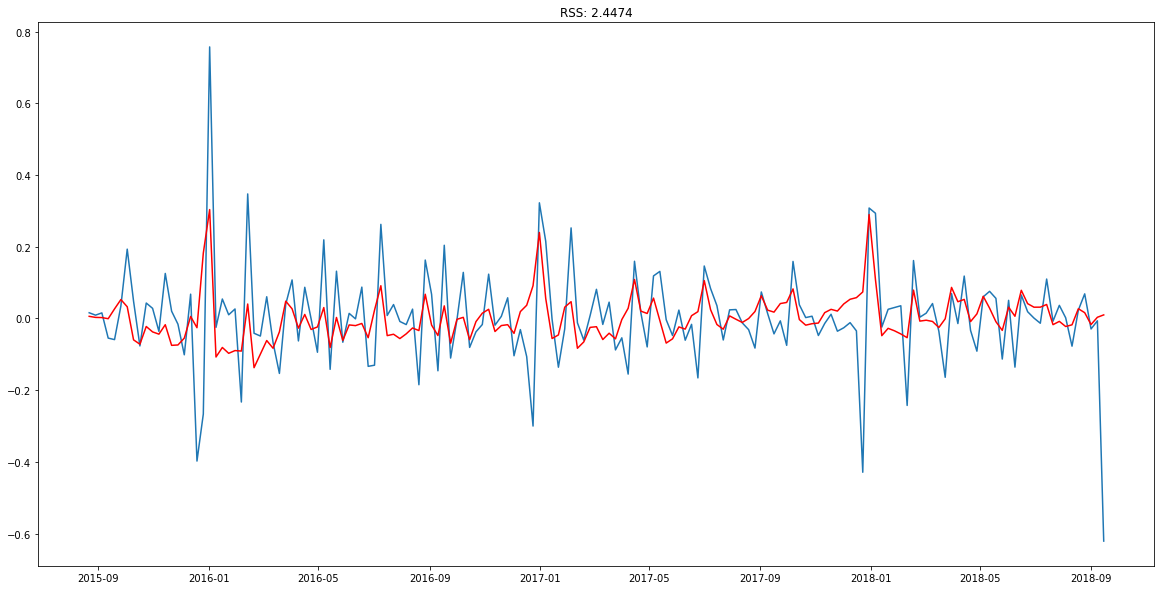

In [65]:
# Applying ARIMA model
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(1,1,1))# (p,d,q)
results = model.fit()
print('aic value for this model is ',results.aic)
plt.figure(figsize=(20,10))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
#plt.title(sum(results.fittedvalues-df_log_shift['historyamount'])**2)
plt.title('RSS: %.4f'% sum((results.fittedvalues-df_log_shift['historyamount'])**2))
print('Plotting AR Model')

In [69]:
df_log_forecast = results.forecast(steps=52)[0]
print(df_log_forecast)
type(df_log_forecast)

[7.77090669 7.9047382  7.96111863 7.98694681 8.00072301 8.00974505
 8.0168917  8.02329858 8.02941362 8.03541355 8.04136808 8.04730468
 8.05323423 8.05916098 8.06508664 8.07101186 8.07693691 8.08286189
 8.08878685 8.0947118  8.10063674 8.10656168 8.11248662 8.11841156
 8.1243365  8.13026144 8.13618638 8.14211132 8.14803625 8.15396119
 8.15988613 8.16581107 8.17173601 8.17766095 8.18358589 8.18951083
 8.19543577 8.20136071 8.20728565 8.21321059 8.21913553 8.22506047
 8.2309854  8.23691034 8.24283528 8.24876022 8.25468516 8.2606101
 8.26653504 8.27245998 8.27838492 8.28430986]


numpy.ndarray

In [77]:
final_prediction = np.exp(df_log_forecast)
print(final_prediction)
rng = pd.date_range(start = "9/22/2018",end = "9/20/2019",freq='W')
csv_data = pd.Series(final_prediction,index=rng)
print(type(csv_data))
print(csv_data)

[2370.61972502 2710.09292272 2867.27857197 2942.29983301 2983.11403112
 3010.14957093 3031.73912838 3051.22544788 3069.94100214 3088.41580666
 3106.86070617 3125.35977895 3143.94678445 3162.63551427 3181.43183837
 3200.33848554 3219.35694052 3238.48819673 3257.73305505 3277.09224236
 3296.56645863 3316.15639558 3335.86274412 3355.68619732 3375.62745157
 3395.68720712 3415.86616825 3436.16504336 3456.58454507 3477.12539021
 3497.78829986 3518.5739994  3539.4832185  3560.5166912  3581.67515586
 3602.95935526 3624.37003658 3645.90795143 3667.57385592 3689.36851062
 3711.29268063 3733.3471356  3755.53264975 3777.85000191 3800.29997552
 3822.8833587  3845.60094422 3868.45352961 3891.44191708 3914.56691365
 3937.82933113 3961.22998614]
<class 'pandas.core.series.Series'>
2018-09-23    2370.619725
2018-09-30    2710.092923
2018-10-07    2867.278572
2018-10-14    2942.299833
2018-10-21    2983.114031
2018-10-28    3010.149571
2018-11-04    3031.739128
2018-11-11    3051.225448
2018-11-18    30

In [78]:
import os
path=r'C:\Users\80071\Desktop\PTC_Forecast'
csv_data.to_csv(os.path.join(path,r'1234893_113821_forecast.csv'))

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


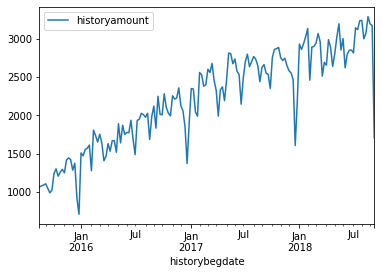

In [76]:
df.plot()

In [75]:
df.tail(20)

,historyamount
historybegdate,
2018-05-05,2800
2018-05-12,3020
2018-05-19,3194
2018-05-26,2852
2018-06-02,3000
2018-06-09,2619
2018-06-16,2796
2018-06-23,2849
2018-06-30,2852


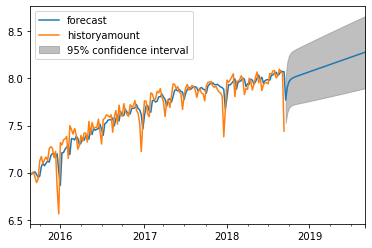

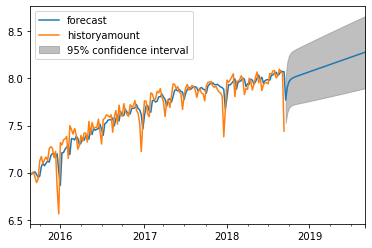

In [35]:
results.plot_predict(1,212)